In [99]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [13]:
ola = pd.read_csv(r'/content/ola_customer_reviews.csv')
uber = pd.read_csv(r'/content/uber_customer_reviews.csv')

In [16]:
ola

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,fbc7ffc9-5a89-446e-87fd-d69bf4a7f984,Puipuii Ralte,NaN,"The map in Ola is so messed up, i have to pay ...",1,0,2023-08-10 16:40:50,NaN,NaN,6.3.2,en,in
1,Google Play,5a0051fb-220a-45b2-ba94-a15a2949218f,Deepak Kumar,NaN,Deepak Kumar.... 🙏🙏🙏🙏🙏],5,0,2023-08-10 16:36:14,NaN,NaN,NaN,en,in
2,Google Play,71ebf933-b734-474d-bb65-a18c90906ed2,Ahamed Azarudeen,NaN,Such aa irresponsible app more then I waiting ...,1,0,2023-08-10 16:29:31,NaN,NaN,6.3.1,en,in
3,Google Play,e1cc0010-60b3-4126-99c2-e8549088566a,Rahil Syed,NaN,Worst,1,0,2023-08-10 15:52:06,NaN,NaN,5.0.4,en,in
4,Google Play,77cf1be1-b428-4493-ae25-e0f288f79b8f,vin 007,NaN,Too much expensive .. try UBer... They are pro...,1,0,2023-08-10 15:51:10,NaN,NaN,NaN,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29023,Google Play,57ef006c-3485-44f0-bbdf-21973df863ea,Chedibansa Kishore,NaN,Very nice service,5,0,2022-10-02 18:31:47,We are delighted to hear such encouraging word...,2022-10-04 12:43:41,NaN,en,in
29024,Google Play,15ef4f10-5860-41cb-a686-df27829a91ad,Jaya Prakash,NaN,Pathetic service ever.app will show some estim...,1,0,2022-10-02 18:27:02,We understand your displeasure and are here to...,2022-10-04 12:43:25,5.7.5,en,in
29025,Google Play,f0b01055-7196-43d2-b412-29cc9eb49797,M S Sharma (Ranbir sing),NaN,Excellent,5,0,2022-10-02 17:55:32,Getting such an amazing rating brings a smile ...,2022-10-04 12:43:22,5.7.5,en,in
29026,Google Play,4a7cd6dd-c52b-4ddd-887f-a64867134ae2,Sreedhar Sandiri,NaN,Good customer care support... 💐,5,0,2022-10-02 17:54:30,Happiness is to hear words like these from our...,2022-10-04 12:43:18,5.7.5,en,in


In [17]:
uber


,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,18d6584c-d0e9-4833-a744-f607058aee97,Milky Way,NaN,"Suddenly, the driver can't have my location an...",1.0,0.0,2023-08-10 17:48:51,NaN,NaN,NaN,en,in
1,Google Play,50a08f18-cece-4ddf-b617-028844c8aa28,Bradlee Severa,NaN,Very cordial.. And helped with a quick turnaro...,5.0,0.0,2023-08-10 17:38:35,NaN,NaN,4.485.10000,en,in
2,Google Play,b0d8e75a-80a7-4dcd-abaf-72b046dbeeb7,Amit Aggarwal,NaN,Very good experience,5.0,0.0,2023-08-10 17:38:17,NaN,NaN,4.486.10002,en,in
3,Google Play,502702a9-25ed-4373-a96c-7fa1f06caacd,Bryant Inman,NaN,All I use,5.0,0.0,2023-08-10 17:37:45,NaN,NaN,4.467.10008,en,in
4,Google Play,f47a3fb6-23db-49bd-9e63-f33c8d724d07,Addie Whittaker,NaN,I have enjoyed traveling by Uber my drivers ha...,5.0,0.0,2023-08-10 17:36:56,NaN,NaN,4.486.10002,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80025,Google Play,9cf750e1-85c5-4e53-aa14-12a0a3d7a4c7,Dakshata Wagh,NaN,Very bad experience . They cancelled the ride ...,1.0,0.0,2023-03-27 02:02:06,NaN,NaN,4.466.10003,en,in
80026,Google Play,8a298a86-aad5-42d0-b053-306fd1c0533b,shem mwichigi,NaN,Perfect,5.0,0.0,2023-03-27 01:57:20,NaN,NaN,4.466.10003,en,in
80027,Google Play,7d2b36d3-2d9e-4d86-a2d7-621ec2bf9484,amando morales (PippyHipShopping),NaN,"The driver was nice, he got me to where I was ...",4.0,0.0,2023-03-27 01:52:38,NaN,NaN,4.464.10000,en,in
80028,Google Play,0b812fe0-bce9-4d51-838b-13195d5df9cd,Saicharan P,NaN,Good,5.0,0.0,2023-03-27 01:51:21,NaN,NaN,4.466.10003,en,in


In [18]:
columns_to_drop = ['review_id', 'user_name', 'review_title', 'appVersion', 'laguage_code', 'country_code']

ola.drop(columns=columns_to_drop, inplace=True)
uber.drop(columns=columns_to_drop, inplace=True)

In [19]:
def extract_time_features(df):
    df['review_date'] = pd.to_datetime(df['review_date'])
    df['day_of_week'] = df['review_date'].dt.day_name()
    df['month'] = df['review_date'].dt.month
    df['month_year'] = df['review_date'].dt.to_period('M')
    return df

# Apply the function to both datasets
uber = extract_time_features(uber)
ola = extract_time_features(ola)

In [20]:
ola['month_year'] = ola['review_date'].dt.strftime('%Y-%m')
uber['month_year'] = uber['review_date'].dt.strftime('%Y-%m')

In [21]:
ola.shape

(29028, 10)

In [22]:
uber.shape

(80030, 10)

In [23]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29028 entries, 0 to 29027
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   source                   29028 non-null  object        
 1   review_description       29027 non-null  object        
 2   rating                   29028 non-null  int64         
 3   thumbs_up                29028 non-null  int64         
 4   review_date              29028 non-null  datetime64[ns]
 5   developer_response       26607 non-null  object        
 6   developer_response_date  26607 non-null  object        
 7   day_of_week              29028 non-null  object        
 8   month                    29028 non-null  int64         
 9   month_year               29028 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.2+ MB


In [24]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80030 entries, 0 to 80029
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   source                   80030 non-null  object        
 1   review_description       80020 non-null  object        
 2   rating                   80029 non-null  float64       
 3   thumbs_up                80029 non-null  float64       
 4   review_date              80029 non-null  datetime64[ns]
 5   developer_response       264 non-null    object        
 6   developer_response_date  264 non-null    object        
 7   day_of_week              80029 non-null  object        
 8   month                    80029 non-null  float64       
 9   month_year               80029 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 6.1+ MB


In [26]:
ola.describe()

,rating,thumbs_up,month
count,29028.000000,29028.000000,29028.000000
mean,1.762402,0.828993,6.393689
std,1.467089,18.068996,3.514489
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,6.000000
75%,1.000000,0.000000,10.000000
max,5.000000,950.000000,12.000000


,rating,thumbs_up,month
count,29028.000000,29028.000000,29028.000000
mean,1.762402,0.828993,6.393689
std,1.467089,18.068996,3.514489
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,6.000000
75%,1.000000,0.000000,10.000000
max,5.000000,950.000000,12.000000


In [27]:
uber.describe()

,rating,thumbs_up,month
count,80029.000000,80029.000000,80029.000000
mean,4.006448,0.590923,5.651014
std,1.600995,22.703739,1.317391
min,1.000000,0.000000,3.000000
25%,3.000000,0.000000,5.000000
50%,5.000000,0.000000,6.000000
75%,5.000000,0.000000,7.000000
max,5.000000,4329.000000,8.000000


**Average Rating**

In [30]:
average_rating_ola = ola['rating'].mean()
print("Average Rating of Ola:", average_rating_ola)

Average Rating of Ola: 1.7624018189334436


In [31]:
average_rating_uber = uber['rating'].mean()
print("Average Rating of Uber:", average_rating_uber)

Average Rating of Uber: 4.006447662722263


**Exploratory Data Analysis**

In [32]:
ola.isnull().sum()

source                        0
review_description            1
rating                        0
thumbs_up                     0
review_date                   0
developer_response         2421
developer_response_date    2421
day_of_week                   0
month                         0
month_year                    0
dtype: int64

In [34]:
uber.isnull().sum()

source                         0
review_description            10
rating                         1
thumbs_up                      1
review_date                    1
developer_response         79766
developer_response_date    79766
day_of_week                    1
month                          1
month_year                     1
dtype: int64

source                         0
review_description            10
rating                         1
thumbs_up                      1
review_date                    1
developer_response         79766
developer_response_date    79766
day_of_week                    1
month                          1
month_year                     1
dtype: int64

In [35]:
print('ola data preview')
ola.head()

ola data preview


,source,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,day_of_week,month,month_year
0,Google Play,"The map in Ola is so messed up, i have to pay ...",1,0,2023-08-10 16:40:50,NaN,NaN,Thursday,8,2023-08
1,Google Play,Deepak Kumar.... 🙏🙏🙏🙏🙏],5,0,2023-08-10 16:36:14,NaN,NaN,Thursday,8,2023-08
2,Google Play,Such aa irresponsible app more then I waiting ...,1,0,2023-08-10 16:29:31,NaN,NaN,Thursday,8,2023-08
3,Google Play,Worst,1,0,2023-08-10 15:52:06,NaN,NaN,Thursday,8,2023-08
4,Google Play,Too much expensive .. try UBer... They are pro...,1,0,2023-08-10 15:51:10,NaN,NaN,Thursday,8,2023-08


In [38]:
print('uber data preview')
uber.head()

uber data preview


,source,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,day_of_week,month,month_year
0,Google Play,"Suddenly, the driver can't have my location an...",1.0,0.0,2023-08-10 17:48:51,NaN,NaN,Thursday,8.0,2023-08
1,Google Play,Very cordial.. And helped with a quick turnaro...,5.0,0.0,2023-08-10 17:38:35,NaN,NaN,Thursday,8.0,2023-08
2,Google Play,Very good experience,5.0,0.0,2023-08-10 17:38:17,NaN,NaN,Thursday,8.0,2023-08
3,Google Play,All I use,5.0,0.0,2023-08-10 17:37:45,NaN,NaN,Thursday,8.0,2023-08
4,Google Play,I have enjoyed traveling by Uber my drivers ha...,5.0,0.0,2023-08-10 17:36:56,NaN,NaN,Thursday,8.0,2023-08


In [44]:
ola.duplicated().sum()


0

In [45]:
uber.duplicated().sum()


0

In [46]:
ola.head().iloc[:,9:]

,month_year
0,2023-08
1,2023-08
2,2023-08
3,2023-08
4,2023-08


In [47]:
uber.head().iloc[:,9:]

,month_year
0,2023-08
1,2023-08
2,2023-08
3,2023-08
4,2023-08


In [49]:
print('Ola review sources')
ola['source'].value_counts()

Ola review sources


Google Play    29028
Name: source, dtype: int64

In [50]:
print('Uber review sources')
uber['source'].value_counts()

Uber review sources


Google Play    80030
Name: source, dtype: int64

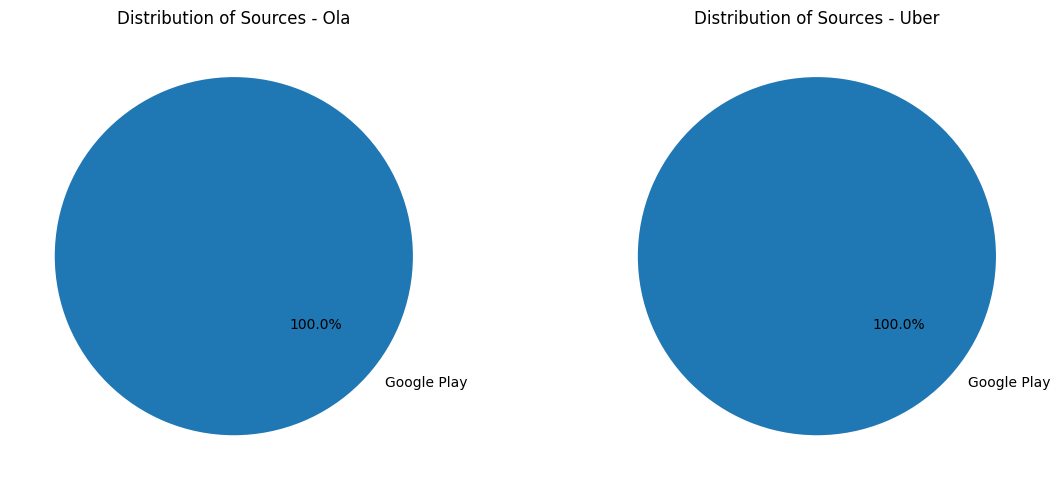

In [66]:
# Count occurrences of each source
ola_source_counts = ola['source'].value_counts()
uber_source_counts = uber['source'].value_counts()

# Create pie charts
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(ola_source_counts, labels=ola_source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sources - Ola')

plt.subplot(1, 2, 2)
plt.pie(uber_source_counts, labels=uber_source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sources - Uber')

plt.tight_layout()
plt.show()



In [67]:
print('Ola review ratings description')
ola["rating"].agg(["min","mean","median","max","std","skew"]).to_frame().T

Ola review ratings description


,min,mean,median,max,std,skew
rating,1.0,1.762402,1.0,5.0,1.467089,1.580491


In [68]:
print('Uber review ratings description')
uber["rating"].agg(["min","mean","median","max","std","skew"]).to_frame().T

Uber review ratings description


,min,mean,median,max,std,skew
rating,1.0,4.006448,5.0,5.0,1.600995,-1.183677


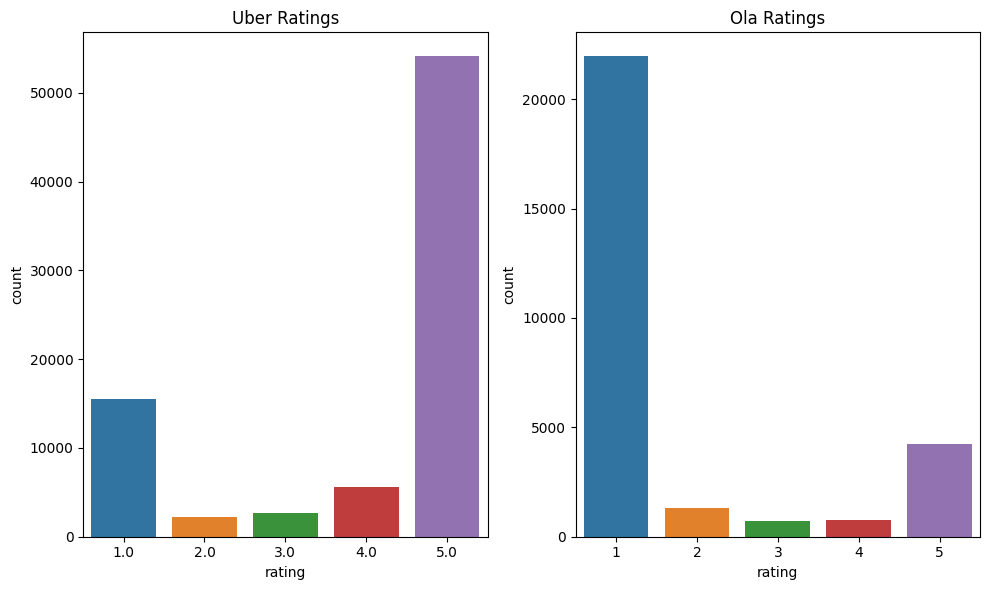

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.countplot(x=uber["rating"], ax=axes[0])
axes[0].set_title('Uber Ratings')

sns.countplot(x=ola["rating"], ax=axes[1])
axes[1].set_title('Ola Ratings')

plt.tight_layout()
plt.show()

In [74]:
ola.corr()

<ipython-input-74-3dbfab5fcbd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ola.corr()


,rating,thumbs_up,month
rating,1.000000,-0.014436,-0.023283
thumbs_up,-0.014436,1.000000,-0.008366
month,-0.023283,-0.008366,1.000000


In [75]:
uber.corr()

<ipython-input-75-51dac884147d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  uber.corr()


,rating,thumbs_up,month
rating,1.000000,-0.036993,0.015831
thumbs_up,-0.036993,1.000000,-0.004980
month,0.015831,-0.004980,1.000000


<ipython-input-79-720e12520e5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ola.corr(),annot=True)


<Axes: >

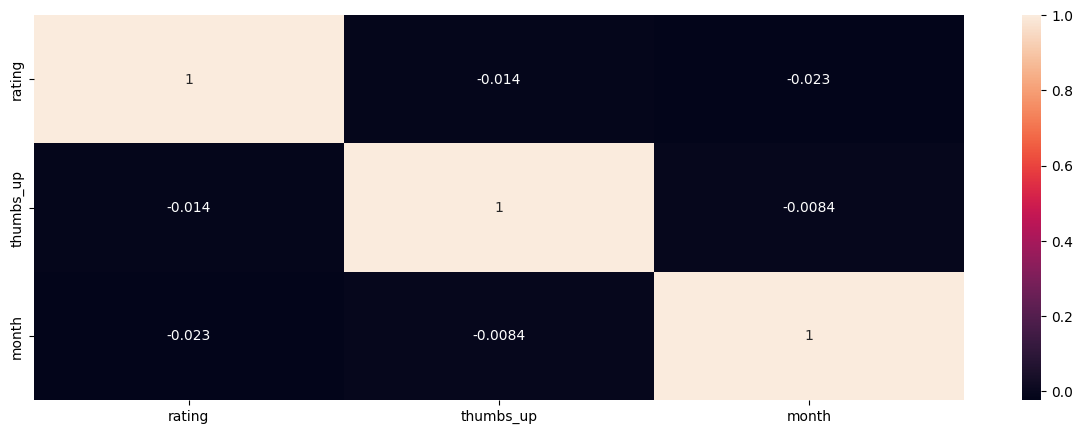

In [79]:
plt.figure(figsize=(15,5))
sns.heatmap(ola.corr(),annot=True)

<ipython-input-80-1e5e134eb99e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uber.corr(),annot=True)


<Axes: >

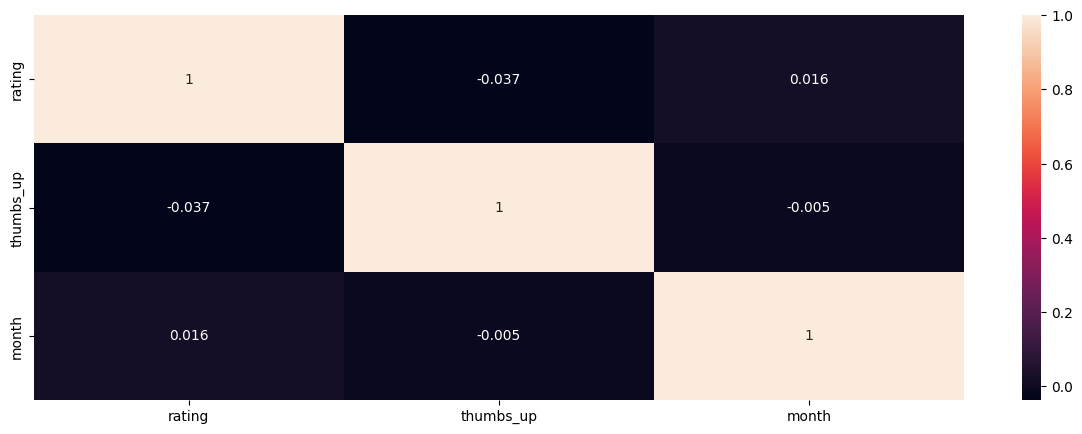

In [80]:
plt.figure(figsize=(15,5))
sns.heatmap(uber.corr(),annot=True)

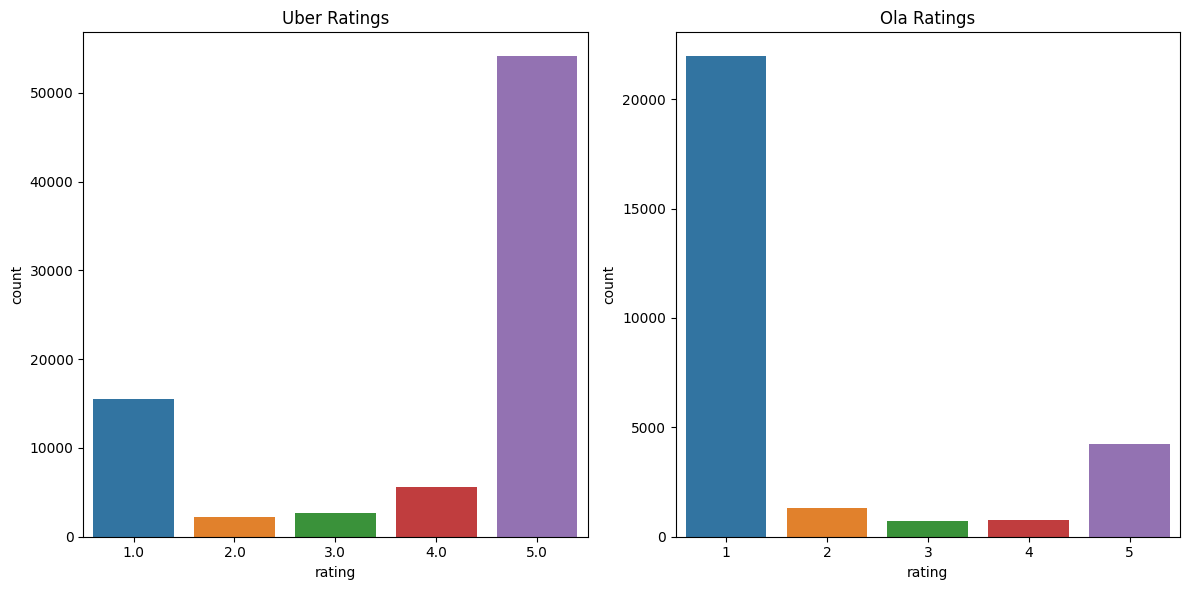

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x=uber["rating"], ax=axes[0])
axes[0].set_title('Uber Ratings')

sns.countplot(x=ola["rating"], ax=axes[1])
axes[1].set_title('Ola Ratings')

plt.tight_layout()
plt.show()

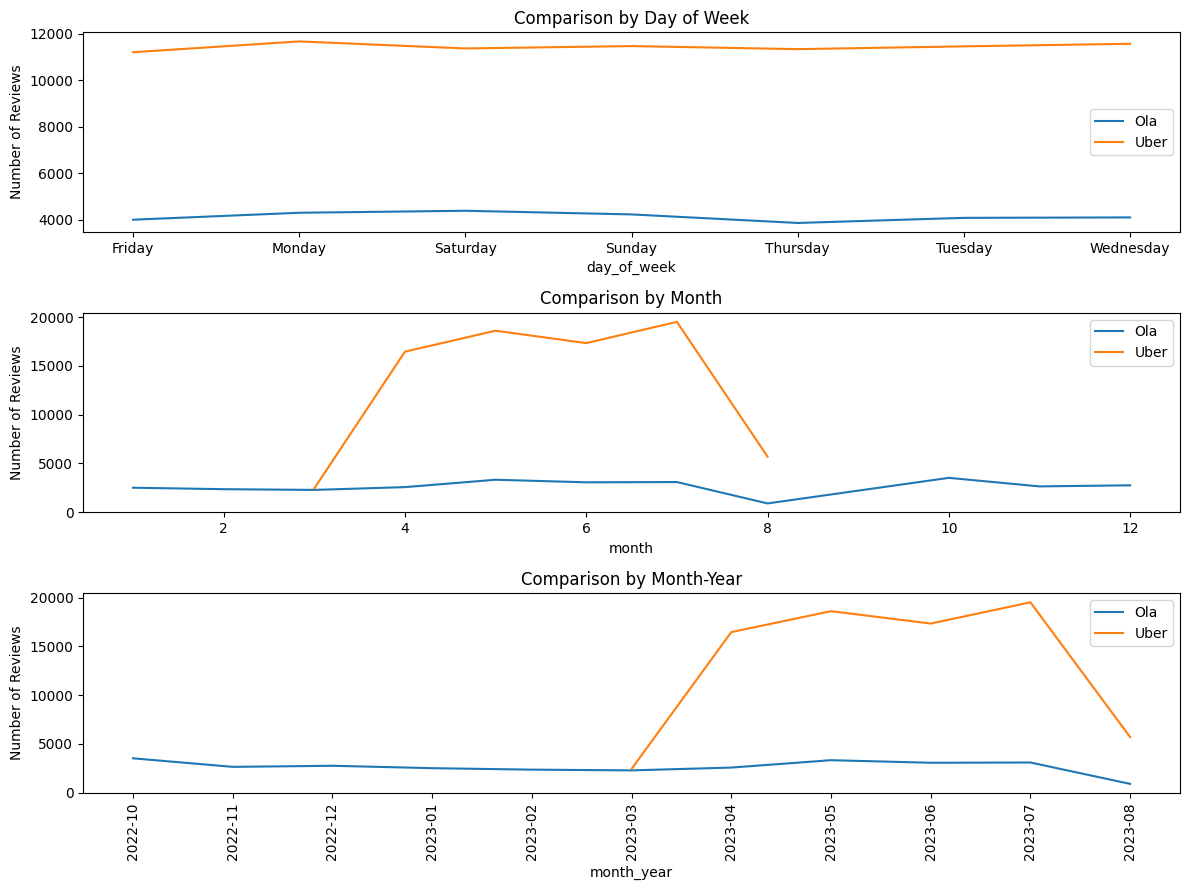

In [87]:
# Sort dataframes by 'month_year' for the plots
ola_sorted = ola.sort_values(by='month_year')
uber_sorted = uber.sort_values(by='month_year')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,9))

# Comparison by day_of_week
sns.lineplot(data=ola_sorted.groupby('day_of_week').size(), label='Ola', ax=axes[0])
sns.lineplot(data=uber_sorted.groupby('day_of_week').size(), label='Uber', ax=axes[0])
axes[0].set_title('Comparison by Day of Week')
axes[0].set_ylabel('Number of Reviews')
axes[0].legend()

# Comparison by month
sns.lineplot(data=ola_sorted.groupby('month').size(), label='Ola', ax=axes[1])
sns.lineplot(data=uber_sorted.groupby('month').size(), label='Uber', ax=axes[1])
axes[1].set_title('Comparison by Month')
axes[1].set_ylabel('Number of Reviews')
axes[1].legend()

# Comparison by month_year
sns.lineplot(data=ola_sorted.groupby('month_year').size(), label='Ola', ax=axes[2])
sns.lineplot(data=uber_sorted.groupby('month_year').size(), label='Uber', ax=axes[2])
axes[2].set_title('Comparison by Month-Year')
axes[2].set_ylabel('Number of Reviews')
axes[2].legend()

# Rotate x-axis labels
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

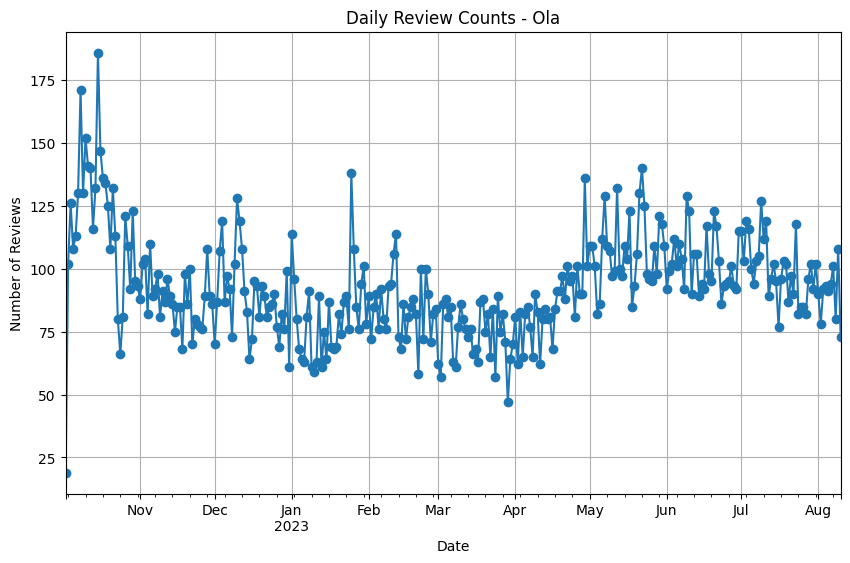

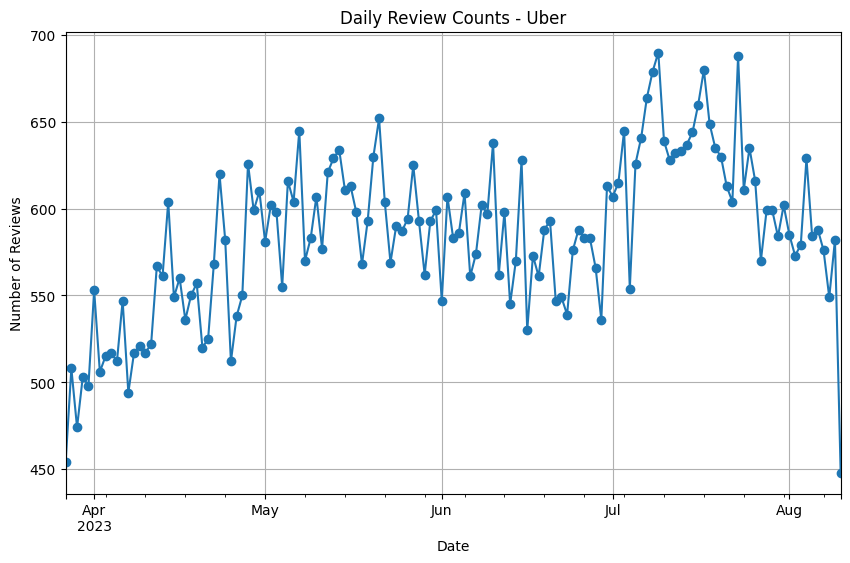

In [88]:
# Convert review_date to datetime format
ola['review_date'] = pd.to_datetime(ola['review_date'])
uber['review_date'] = pd.to_datetime(uber['review_date'])

# Set review_date as the index
ola.set_index('review_date', inplace=True)
uber.set_index('review_date', inplace=True)

# Resample data to get a daily count of reviews
ola_daily_review_counts = ola.resample('D').size()
uber_daily_review_counts = uber.resample('D').size()

# Plot time series of daily review counts for Ola
plt.figure(figsize=(10, 6))
ola_daily_review_counts.plot(marker='o')
plt.title('Daily Review Counts - Ola')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# Plot time series of daily review counts for Uber
plt.figure(figsize=(10, 6))
uber_daily_review_counts.plot(marker='o')
plt.title('Daily Review Counts - Uber')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

**Sentiment Analysis**

In [100]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [101]:
# Convert the 'Text' column to string type to handle any float values
ola['review_description'] = ola['review_description'].astype(str)
uber['review_description'] = uber['review_description'].astype(str)

In [102]:
def classify_sentiment(text):
    # Check if the input is a string
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0.05:
            return 'positive'
        elif polarity < -0.05:
            return 'negative'
        else:
            return 'neutral'
    return None

# Apply the function to the 'review_description' columns of both dataframes
ola['sentiment'] = ola['review_description'].apply(classify_sentiment)
uber['sentiment'] = uber['review_description'].apply(classify_sentiment)

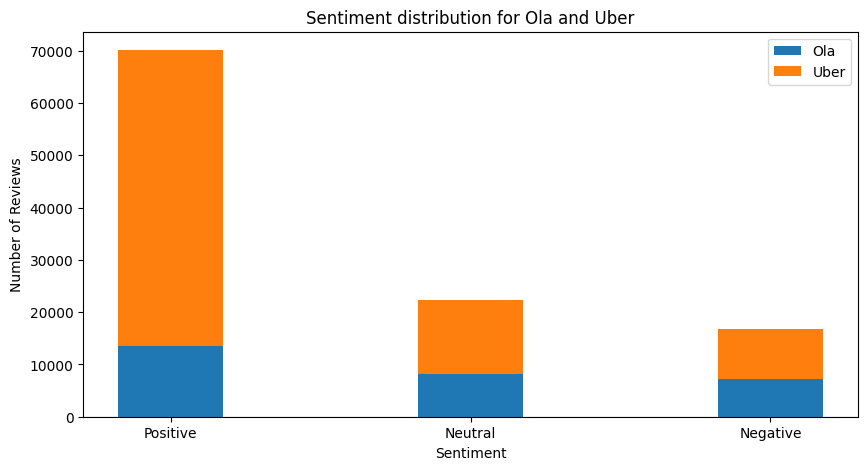

In [103]:
# Prepare data
ola_counts = ola['sentiment'].value_counts()
uber_counts = uber['sentiment'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Set width of the bars
width = 0.35

# Set positions of the bars
ind = ola_counts.index

# Bar positions for Ola and Uber
p1 = ax.bar(ind, ola_counts, width)
p2 = ax.bar(ind, uber_counts, width, bottom=ola_counts)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment distribution for Ola and Uber')
ax.set_xticks(ind)
ax.set_xticklabels(('Positive', 'Neutral', 'Negative'))
ax.legend((p1[0], p2[0]), ('Ola', 'Uber'))

plt.show()

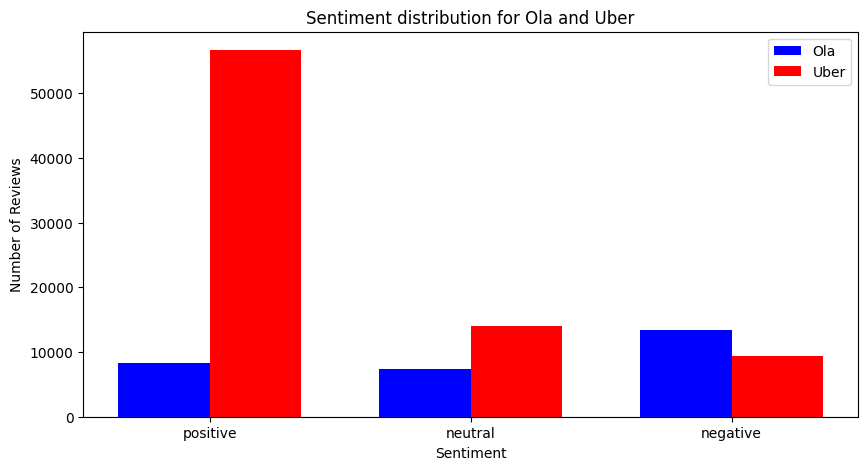

In [104]:
import numpy as np

# Ensure both series have the same indices (in case one lacks a sentiment)
all_sentiments = ['positive', 'neutral', 'negative']
ola_counts = ola_counts.reindex(all_sentiments, fill_value=0)
uber_counts = uber_counts.reindex(all_sentiments, fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Set width of the bars
width = 0.35

# Bar positions
ind = np.arange(len(ola_counts))

ola_bars = ax.bar(ind - width/2, ola_counts, width, label='Ola', color='blue')
uber_bars = ax.bar(ind + width/2, uber_counts, width, label='Uber', color='red')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment distribution for Ola and Uber')
ax.set_xticks(ind)
ax.set_xticklabels(all_sentiments)
ax.legend()

plt.show()

In [119]:

#Remove Stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')
text = "this is a sentence with stopwords."
filtered_text=" ".join([word for word in text.split() if word not in stopwords ])
print(filtered_text)


sentence stopwords.


In [122]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords data
nltk.download('stopwords')

# Define the stopwords set
stop_words = set(stopwords.words('english'))

# Create a Snowball stemmer instance
stemmer = SnowballStemmer("english")

# Function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

# Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    return text

# Stemming
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
ola['review_description'] = ola['review_description'].astype(str)
ola['review_description'] = ola['review_description'].apply(lambda x: remove_stopwords(x))
ola['review_description'] = ola['review_description'].apply(lambda x: clean_text(x))
ola['review_description'] = ola['review_description'].apply(stemming)

uber['review_description'] = uber['review_description'].astype(str)
uber['review_description'] = uber['review_description'].apply(lambda x: remove_stopwords(x))
uber['review_description'] = uber['review_description'].apply(lambda x: clean_text(x))
uber['review_description'] = uber['review_description'].apply(stemming)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
ola['review_description']


review_date
2023-08-10 16:40:50    the map ola mess up pay rs extra map incorrect...
2023-08-10 16:36:14                                         deepak kumar
2023-08-10 16:29:31    such aa irrespons app i wait hour wast app ple...
2023-08-10 15:52:06                                                worst
2023-08-10 15:51:10    too much expens tri uber they provid cheap rid...
                                             ...                        
2022-10-02 18:31:47                                     veri nice servic
2022-10-02 18:27:02    pathet servic ever app show estim price ride a...
2022-10-02 17:55:32                                                excel
2022-10-02 17:54:30                             good custom care support
2022-10-02 17:43:58    useless help servic driver also they cant help...
Name: review_description, Length: 29028, dtype: object

In [124]:
uber['review_description']

review_date
2023-08-10 17:48:51    sudden driver can t locat call ask i i go it s...
2023-08-10 17:38:35    veri cordial and help quick turnaround ride we...
2023-08-10 17:38:17                                     veri good experi
2023-08-10 17:37:45                                            all i use
2023-08-10 17:36:56    i enjoy travel uber driver polit good conversa...
                                             ...                        
2023-03-27 02:02:06    veri bad experi they cancel ride right time wi...
2023-03-27 01:57:20                                              perfect
2023-03-27 01:52:38    the driver nice got i go time accord app deser...
2023-03-27 01:51:21                                                 good
NaT                                                                  nan
Name: review_description, Length: 80030, dtype: object


**Model Training for Sentiment Analysis**

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a DataFrame 'df' with columns 'review_description' and 'rating'
X = ola['review_description']
y = ola['rating']

X = uber['review_description']
y = uber['rating']
# Convert ratings to binary sentiment labels (1 for positive, 0 for negative)
y = (y > 3).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words representation of the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

# Create and train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)



MultinomialNB()

In [127]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9259652630263651
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4084
           1       0.95      0.95      0.95     11922

    accuracy                           0.93     16006
   macro avg       0.90      0.90      0.90     16006
weighted avg       0.93      0.93      0.93     16006



In [129]:
new_text = ["This drive was amazing! Bad driver tho"]
new_text_vectorized = vectorizer.transform(new_text)

In [130]:
predicted_sentiment = model.predict(new_text_vectorized)

if predicted_sentiment[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)

Predicted Sentiment: Positive


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

In [134]:
pp.ProfileReport(ola)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
pp.ProfileReport(uber)

NameError: name 'pp' is not defined